In [1]:
import glob, os
import pandas as pd
from pathlib import Path
from nilearn import plotting
from nilearn import image as niimg
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm import cluster_level_inference
from nilearn.glm import threshold_stats_img
from nilearn.image import threshold_img
from nilearn.reporting import get_clusters_table
from nilearn.glm.second_level import SecondLevelModel


In [2]:
output_dir = '/BICNAS2/tuominen/trsnrm/derivatives/iteration1/fMRI_output_social'
files = glob.glob(f'{output_dir}/*confound-simple_contrast-mov1_sensinput.nii.gz')
files.sort()



In [3]:
design_matrix = pd.DataFrame(
    [1] * len(files),
    columns=['intercept'])

In [4]:
second_level_model = SecondLevelModel(smoothing_fwhm=6, mask_img='/usr/local/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz')
second_level_model = second_level_model.fit(
    files,
    design_matrix=design_matrix
)

/tmp/ipykernel_1406281/3235960100.py:2: UserWarning: [NiftiMasker.fit] Generation of a mask has been requested (imgs != None) while a mask was given at masker creation. Given mask will be used.
  second_level_model = second_level_model.fit(


In [5]:
map = second_level_model.compute_contrast(
    second_level_contrast='intercept',
    output_type='all'
    )

/usr/local/fsl/lib/python3.11/site-packages/joblib/memory.py:312: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  return self.func(*args, **kwargs)


[SecondLevelModel.compute_contrast] Resampling images

In [6]:
map

{'z_score': <nibabel.nifti1.Nifti1Image at 0x719dee38d950>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x71a0461484d0>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x719d9ff21890>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x719db1d67550>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x71a04614fc90>}

In [7]:
import numpy as np
np.max(map['p_value'].get_fdata())

0.9999999994652128

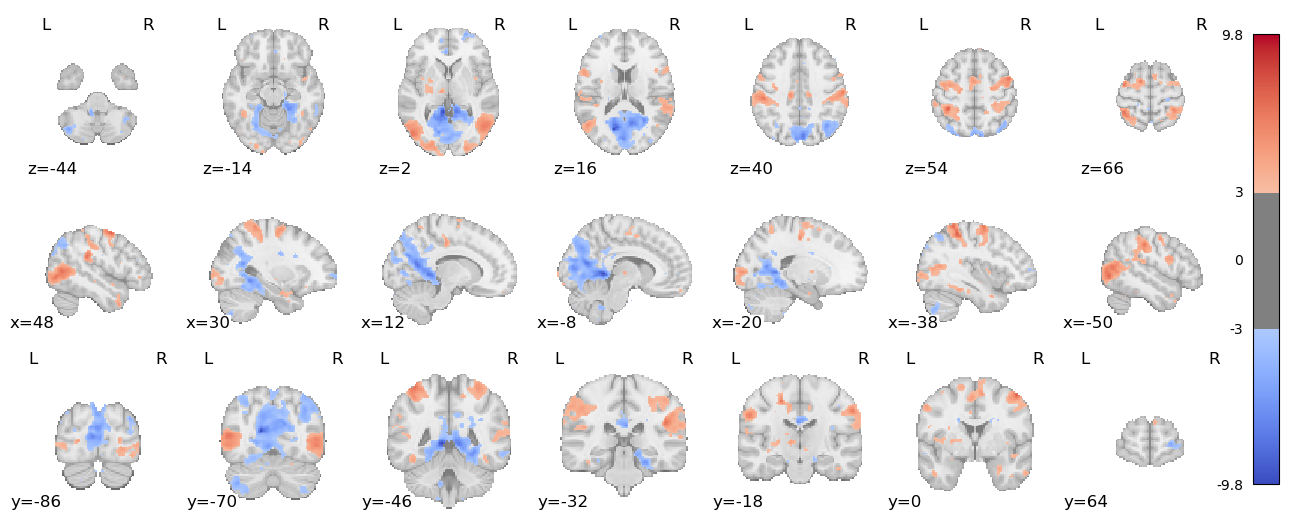

In [8]:
plotting.plot_stat_map(map['stat'], threshold=3, display_mode='mosaic', colorbar=True, cmap='coolwarm')

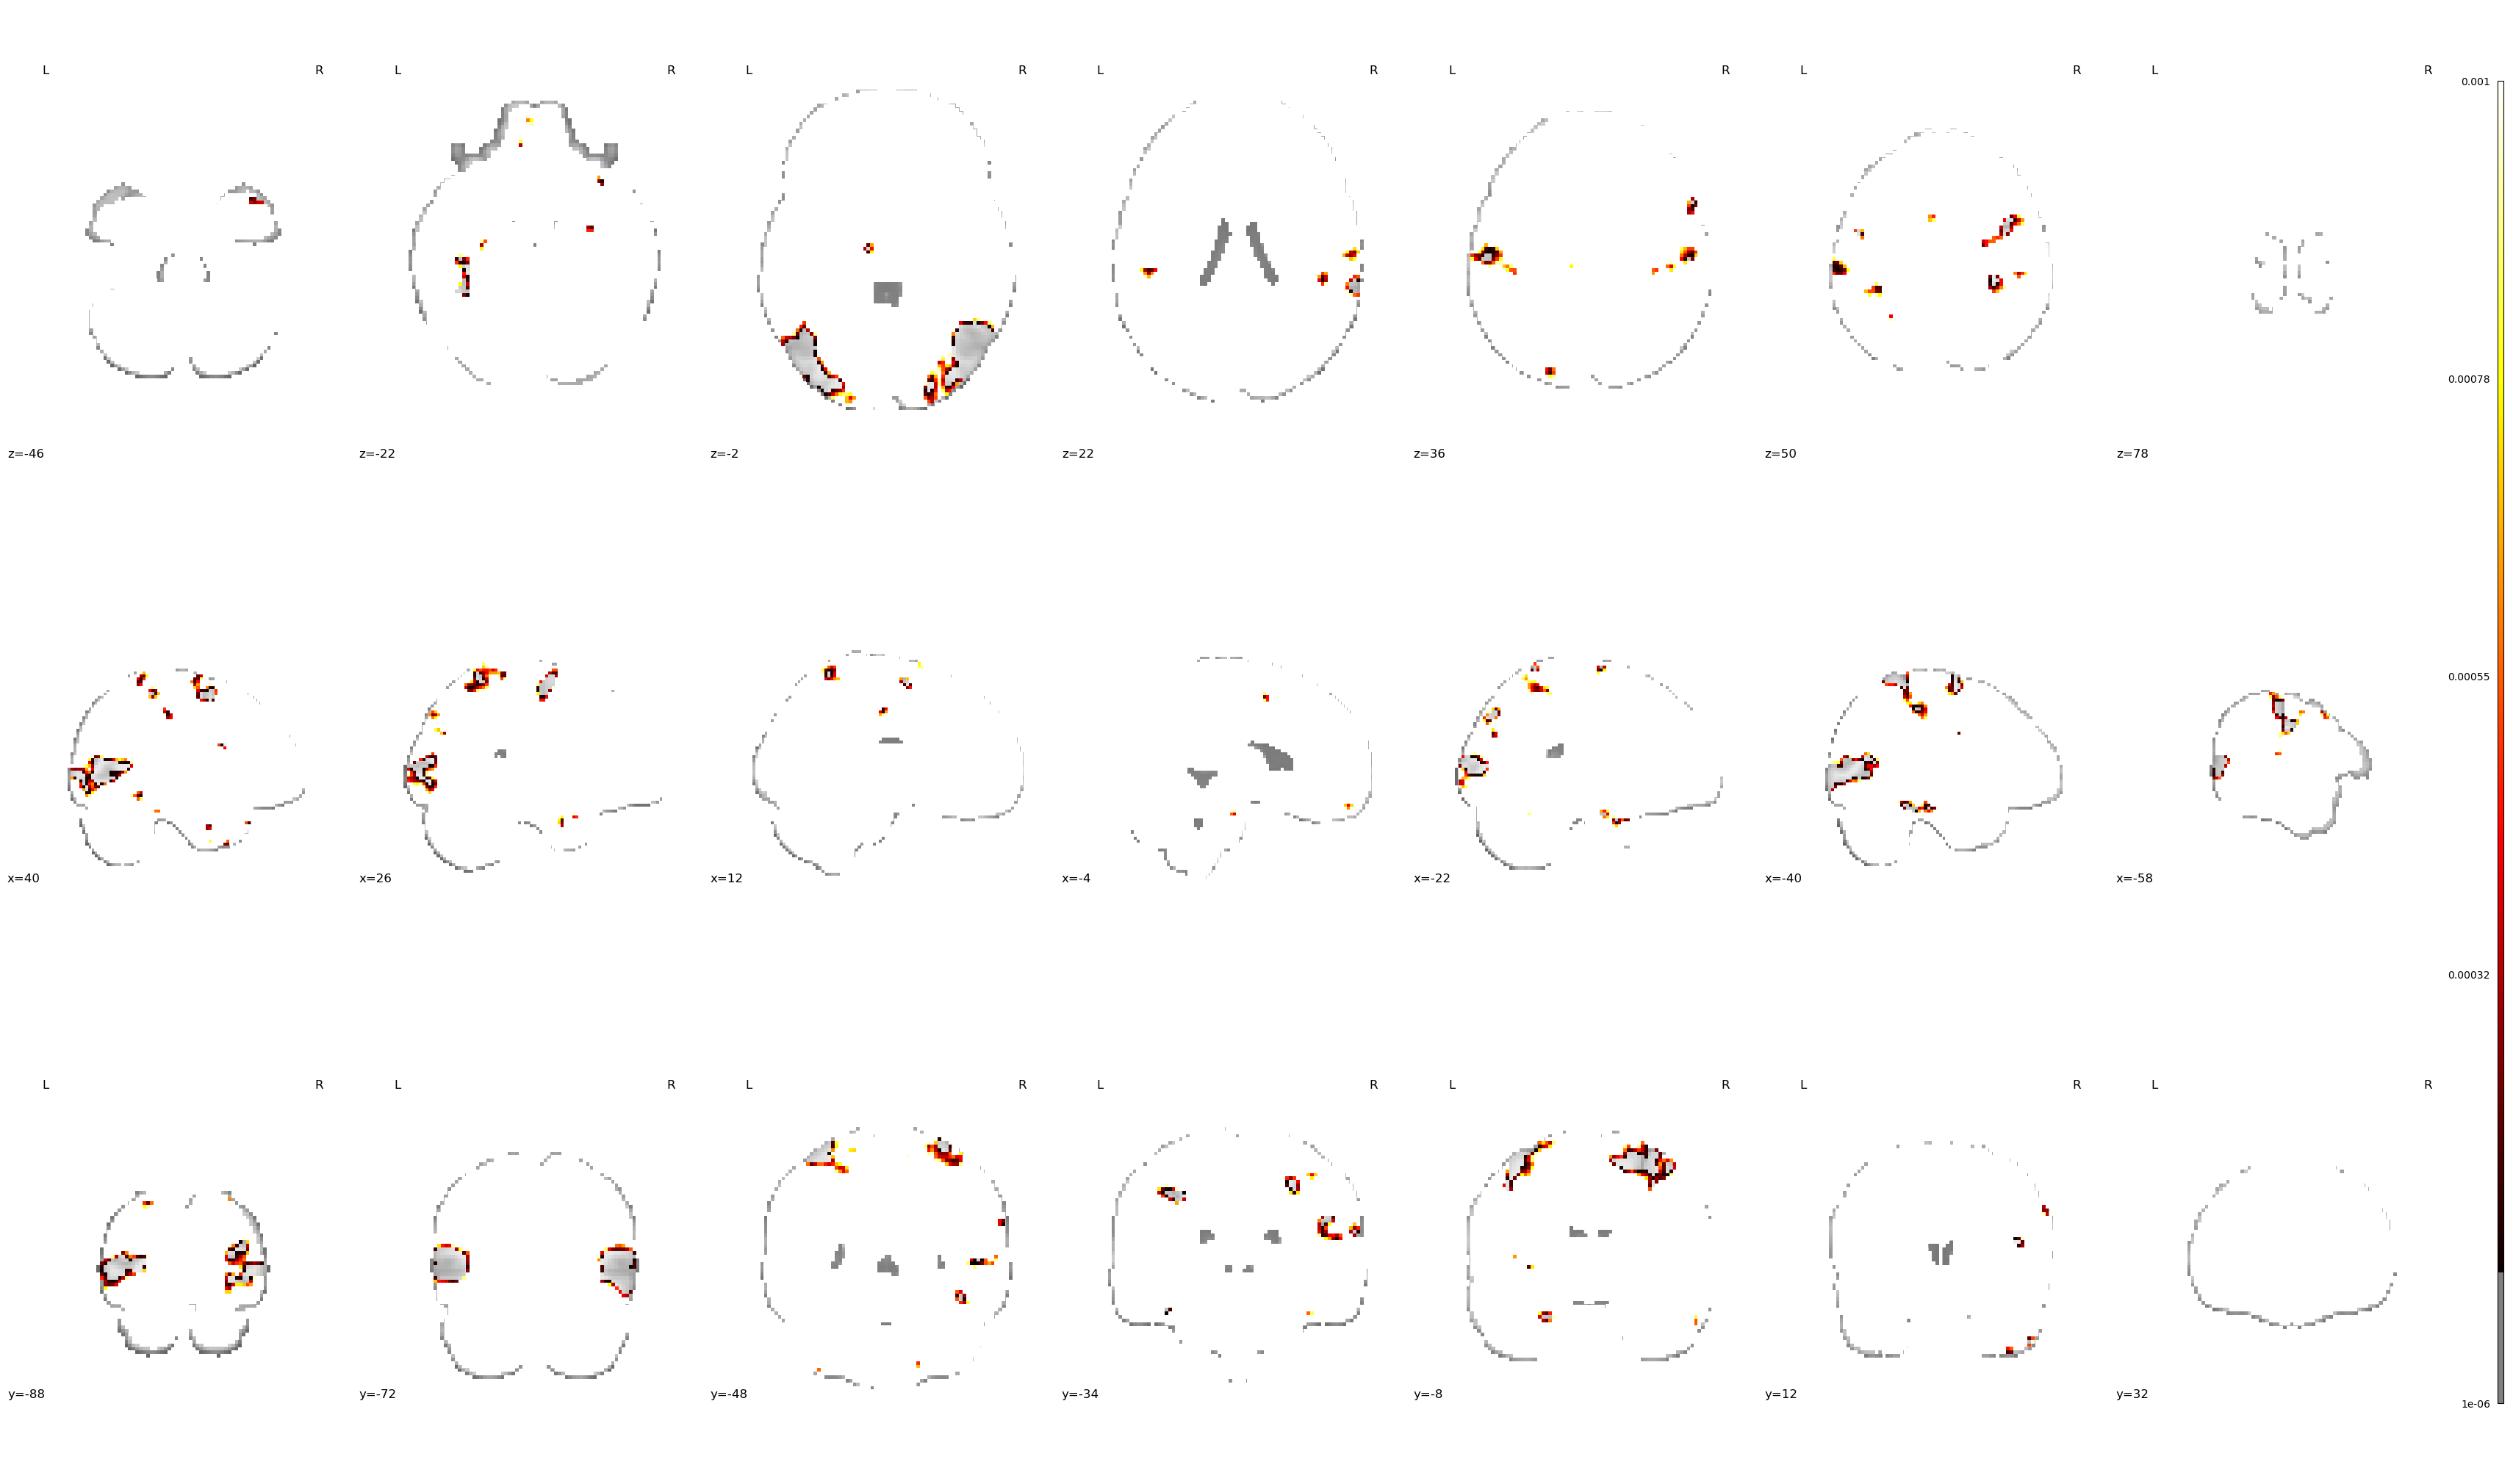

In [ ]:
plotting.plot_stat_map(map['p_value'], symmetric_cbar=False, vmax=0.001, display_mode='mosaic', colorbar=True, cmap='hot')

In [31]:
?plotting.plot_stat_map

Signature:
plotting.plot_stat_map(
    stat_map_img,
    bg_img=<MNI152Template>,
    cut_coords=None,
    output_file=None,
    display_mode='ortho',
    colorbar=True,
    cbar_tick_format='%.2g',
    figure=None,
    axes=None,
    title=None,
    threshold=1e-06,
    annotate=True,
    draw_cross=True,
    black_bg='auto',
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7234b054d310>,
    symmetric_cbar='auto',
    dim='auto',
    vmin=None,
    vmax=None,
    radiological=False,
    resampling_interpolation='continuous',
    **kwargs,
)
Docstring:
Plot cuts of an ROI/mask image.

By default 3 cuts: Frontal, Axial, and Lateral.

Parameters
----------
stat_map_img : Niimg-like object
    See :ref:`extracting_data`.
    The statistical map image

bg_img : Niimg-like object, optional
    See :ref:`extracting_data`.
    The background image to plot on top of.
    If nothing is specified, the MNI152 template will be used.
    To turn off background image, just pass "bg_i